This script is to map the slope data w weather data

In [34]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import pyproj
from tqdm import tqdm
import numpy as np

In [35]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [36]:
# check python version and all packages version
def check_python_version():
    import sys
    print("Python version")
    print (sys.version)
    print("Pandas version")
    print(pd.__version__)
    print("Geopandas version")
    print(gpd.__version__)
    print("Xarray version")
    print(xr.__version__)
    print("Pyproj version")
    print(pyproj.__version__)

check_python_version()

Python version
3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Pandas version
2.2.2
Geopandas version
0.14.2
Xarray version
2023.6.0
Pyproj version
3.6.1


In [37]:
pd.set_option('display.max_colwidth', None)

In [38]:
files = os.listdir('../Weather_Data/')
files

['dead_fuel_moisture_1000hr.2001.2023.CA.nc',
 'dead_fuel_moisture_100hr.2001.2023.CA.nc',
 'expanded_Palmer_Drought_Severity_Index.2001.2023.CA.nc',
 'max_air_temperature.2001.2023.CA-008.nc',
 'max_relative_humidity.2001.2023.CA.nc',
 'max_wind_speed.2001.2023.CA.nc',
 'min_air_temperature.2001.2023.CA-009.nc',
 'min_relative_humidity.2001.2023.CA.nc',
 'Palmer_Drought_Severity_Index.2001.2023.CA.nc',
 'precipitation_amount.2001.2023.CA.nc',
 'specific_humidity.2001.2023.CA.nc',
 'surface_downwelling_shortwave_flux.2001.2023.CA.nc',
 'wind_from_direction.2001.2023.CA.nc',
 'wind_speed.2001.2023.CA.nc']

In [39]:
data_dir = '../Weather_Data/'
# Load the first dataset to use as a reference
reference_ds = xr.open_dataset(os.path.join(data_dir, files[-1]))

In [40]:
print(f"Dimensions: {reference_ds.dims}")
print(f"Coordinates: {reference_ds.coords}")
print(f"Data variables: {reference_ds.data_vars}")

Dimensions: Frozen({'day': 8400, 'lon': 259, 'lat': 240})
Coordinates: Coordinates:
  * day      (day) datetime64[ns] 2001-01-01 2001-01-02 ... 2023-12-31
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -114.1 -114.1 -114.0
  * lat      (lat) float64 41.98 41.94 41.9 41.86 ... 32.15 32.11 32.07 32.03
Data variables: Data variables:
    wind_speed  (day, lat, lon) float32 ...


In [41]:
# Extract lon and lat coordinates
lon = reference_ds.coords['lon'].values
lat = reference_ds.coords['lat'].values

# Create a DataFrame with all combinations of lon and lat
lon_lat_combinations = pd.DataFrame([(lo, la) for lo in lon for la in lat], columns=['lon', 'lat'])

In [42]:
lon_lat_combinations.head()

,lon,lat
0,-124.766667,41.983333
1,-124.766667,41.941667
2,-124.766667,41.900000
3,-124.766667,41.858333
4,-124.766667,41.816667


In [43]:
lon_lat_combinations.shape[0] == 259*240 # 62,160

True

In [44]:
slope_avg_CA = xr.open_dataset('../Slope_Data/slope_avg.nc')
slope_max_CA = xr.open_dataset('../Slope_Data/slope_max.nc')

In [45]:
slope_avg_CA

<xarray.Dataset>
Dimensions:    (lon: 249, lat: 228)
Coordinates:
  * lon        (lon) float64 -124.5 -124.4 -124.4 ... -114.2 -114.2 -114.1
  * lat        (lat) float64 42.01 41.97 41.92 41.88 ... 32.67 32.63 32.59 32.55
Data variables:
    slope_avg  (lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    Source_Software:  Esri ArcGIS

In [46]:
slope_max_CA

<xarray.Dataset>
Dimensions:    (lon: 249, lat: 228)
Coordinates:
  * lon        (lon) float64 -124.5 -124.4 -124.4 ... -114.2 -114.2 -114.1
  * lat        (lat) float64 42.01 41.97 41.92 41.88 ... 32.67 32.63 32.59 32.55
Data variables:
    slope_max  (lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    Source_Software:  Esri ArcGIS

In [47]:
slope_avg_CA = slope_avg_CA.to_dataframe().reset_index()
slope_max_CA = slope_max_CA.to_dataframe().reset_index()

In [48]:
slope_max_CA.head()

,lon,lat,slope_max
0,-124.461667,42.007500,NaN
1,-124.461667,41.965833,NaN
2,-124.461667,41.924167,NaN
3,-124.461667,41.882500,NaN
4,-124.461667,41.840833,NaN


In [49]:
# check % of NA in column
slope_avg_CA['slope_avg'].isna().sum() / slope_avg_CA.shape[0]

0.5662650602409639

In [50]:
# check % of NA in column
slope_max_CA['slope_max'].isna().sum() / slope_max_CA.shape[0]

0.5662650602409639

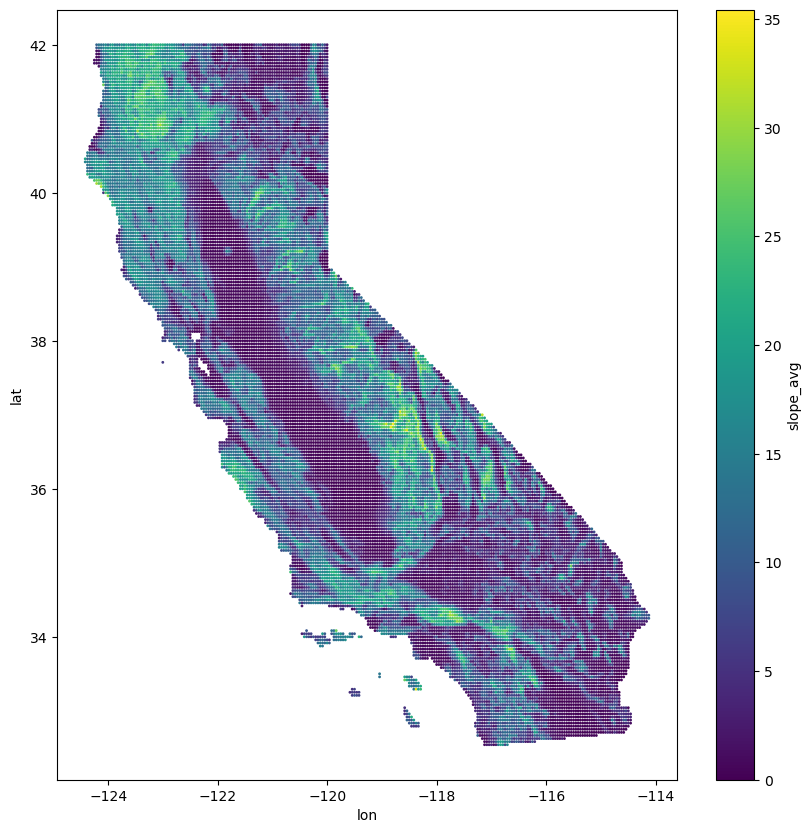

In [51]:
# plot the vegetation_dat
slope_avg_CA.plot(kind='scatter', x='lon', y='lat', c='slope_avg', cmap='viridis', s=1, figsize=(10, 10))
plt.show()

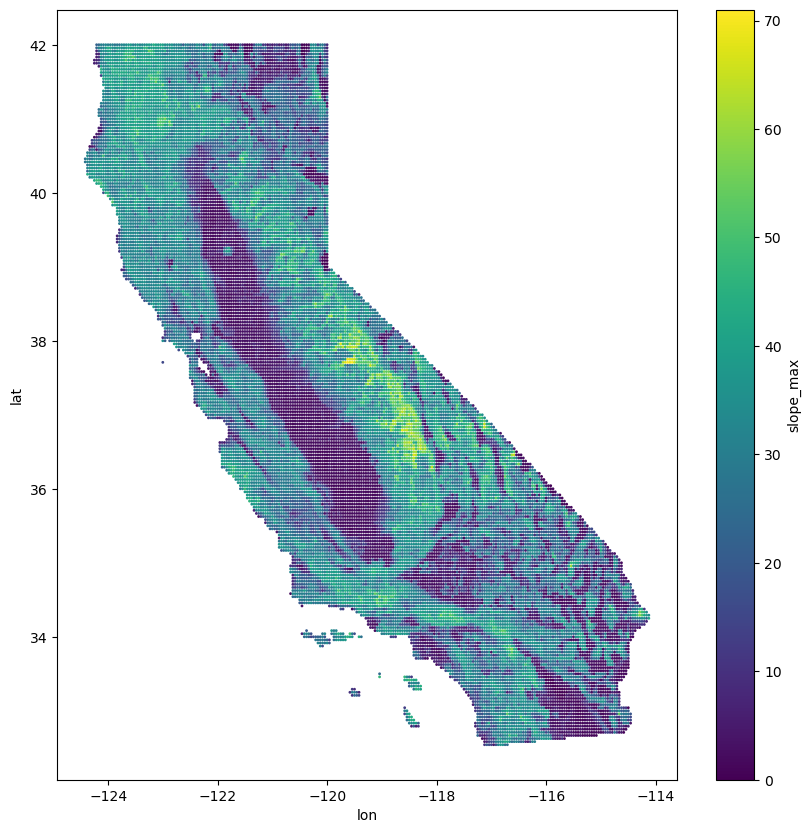

In [52]:
# plot the vegetation_dat
slope_max_CA.plot(kind='scatter', x='lon', y='lat', c='slope_max', cmap='viridis', s=1, figsize=(10, 10))
plt.show()

In [53]:
slope_max_CA.head()

,lon,lat,slope_max
0,-124.461667,42.007500,NaN
1,-124.461667,41.965833,NaN
2,-124.461667,41.924167,NaN
3,-124.461667,41.882500,NaN
4,-124.461667,41.840833,NaN


In [62]:
slope_avg_CA.head()

,lon,lat,slope_avg
0,-124.461667,42.007500,NaN
1,-124.461667,41.965833,NaN
2,-124.461667,41.924167,NaN
3,-124.461667,41.882500,NaN
4,-124.461667,41.840833,NaN


In [56]:
# merge the slope data with the lon_lat_combinations
test_merge = lon_lat_combinations.merge(slope_avg_CA, on=['lon', 'lat'], how='inner')

In [57]:
test_merge.shape

(0, 3)

In [58]:
# example to use geodesic()
from geopy.distance import geodesic

# Define the coordinates
coords_1 = (40.452058, -124.374975)
coords_2 = (40.41039, -124.374975)

# Calculate the distance
distance = geodesic(coords_1, coords_2).km

# Print the distance
print(f"Distance: {distance} km")

Distance: 4.626936837923472 km


In [63]:
slope_avg_CA.shape, slope_max_CA.shape

((56772, 3), (56772, 3))

In [64]:
# merge slope_avg_CA and slope_max_CA
slope_merge = slope_avg_CA.merge(slope_max_CA, on=['lon', 'lat'], how='inner')
slope_merge.shape

(56772, 4)

In [65]:
slope_merge.head()

,lon,lat,slope_avg,slope_max
0,-124.461667,42.007500,NaN,NaN
1,-124.461667,41.965833,NaN,NaN
2,-124.461667,41.924167,NaN,NaN
3,-124.461667,41.882500,NaN,NaN
4,-124.461667,41.840833,NaN,NaN


In [59]:
lon_lat_combinations.shape

(62160, 2)

In [66]:
from scipy.spatial import cKDTree

# Create a KDTree
tree = cKDTree(slope_merge[['lat', 'lon']].values)

# Query the nearest neighbors for each point in lon_lat_combinations
approx_distances, indices = tree.query(lon_lat_combinations[['lat', 'lon']].values, k=1)

In [67]:
#  check the range pf distances
approx_distances.min(), approx_distances.max()

(0.022000611102217637, 0.6064451122003376)

In [68]:
# Calculate the exact geodesic distances
exact_distances = []
for i, idx in enumerate(indices):
    coords_1 = (lon_lat_combinations.iloc[i]['lat'], lon_lat_combinations.iloc[i]['lon'])
    coords_2 = (slope_merge.iloc[idx]['lat'], slope_merge.iloc[idx]['lon'])
    distance = geodesic(coords_1, coords_2).km
    exact_distances.append(distance)

# Convert exact_distances to a numpy array
exact_distances = np.array(exact_distances)

In [69]:
#  check the range pf distances
exact_distances.min(), exact_distances.max()

(2.2359634620047166, 64.83844219667336)

In [71]:
# fill NA with 0
slope_merge['slope_avg'] = slope_merge['slope_avg'].fillna(0)
slope_merge['slope_max'] = slope_merge['slope_max'].fillna(0)
# check % of NA in column
slope_merge['slope_avg'].isna().sum() / slope_merge.shape[0]

0.0

In [72]:
slope_merge.head()

,lon,lat,slope_avg,slope_max
0,-124.461667,42.007500,0.0,0.0
1,-124.461667,41.965833,0.0,0.0
2,-124.461667,41.924167,0.0,0.0
3,-124.461667,41.882500,0.0,0.0
4,-124.461667,41.840833,0.0,0.0


In [76]:
slope_merge

,lon,lat,slope_avg,slope_max
0,-124.461667,42.007500,0.0,0.0
1,-124.461667,41.965833,0.0,0.0
2,-124.461667,41.924167,0.0,0.0
3,-124.461667,41.882500,0.0,0.0
4,-124.461667,41.840833,0.0,0.0
...,...,...,...,...
56767,-114.128333,32.715833,0.0,0.0
56768,-114.128333,32.674167,0.0,0.0
56769,-114.128333,32.632500,0.0,0.0
56770,-114.128333,32.590833,0.0,0.0


In [94]:
# Filter out distances greater than 2 km
mask = exact_distances < 4
# Assign the nearest type and distance to lon_lat_combinations
lon_lat_combinations['slope_avg'] = np.where(mask, slope_merge.iloc[indices]['slope_avg'].values, np.nan)
lon_lat_combinations['slope_max'] = np.where(mask, slope_merge.iloc[indices]['slope_max'].values, np.nan)
lon_lat_combinations['distance'] = np.where(mask, exact_distances, np.nan)

In [95]:
# check the % of NA in lon_lat_combinations
lon_lat_combinations['slope_avg'].isna().sum() / lon_lat_combinations.shape[0]

0.08301158301158301

In [96]:
# check the % of NA in lon_lat_combinations
lon_lat_combinations['slope_max'].isna().sum() / lon_lat_combinations.shape[0]

0.08301158301158301

Plot 2 maps side by side to check the slope data before and after mapping w weather data
- Left: after mapping
- Right: before mapping

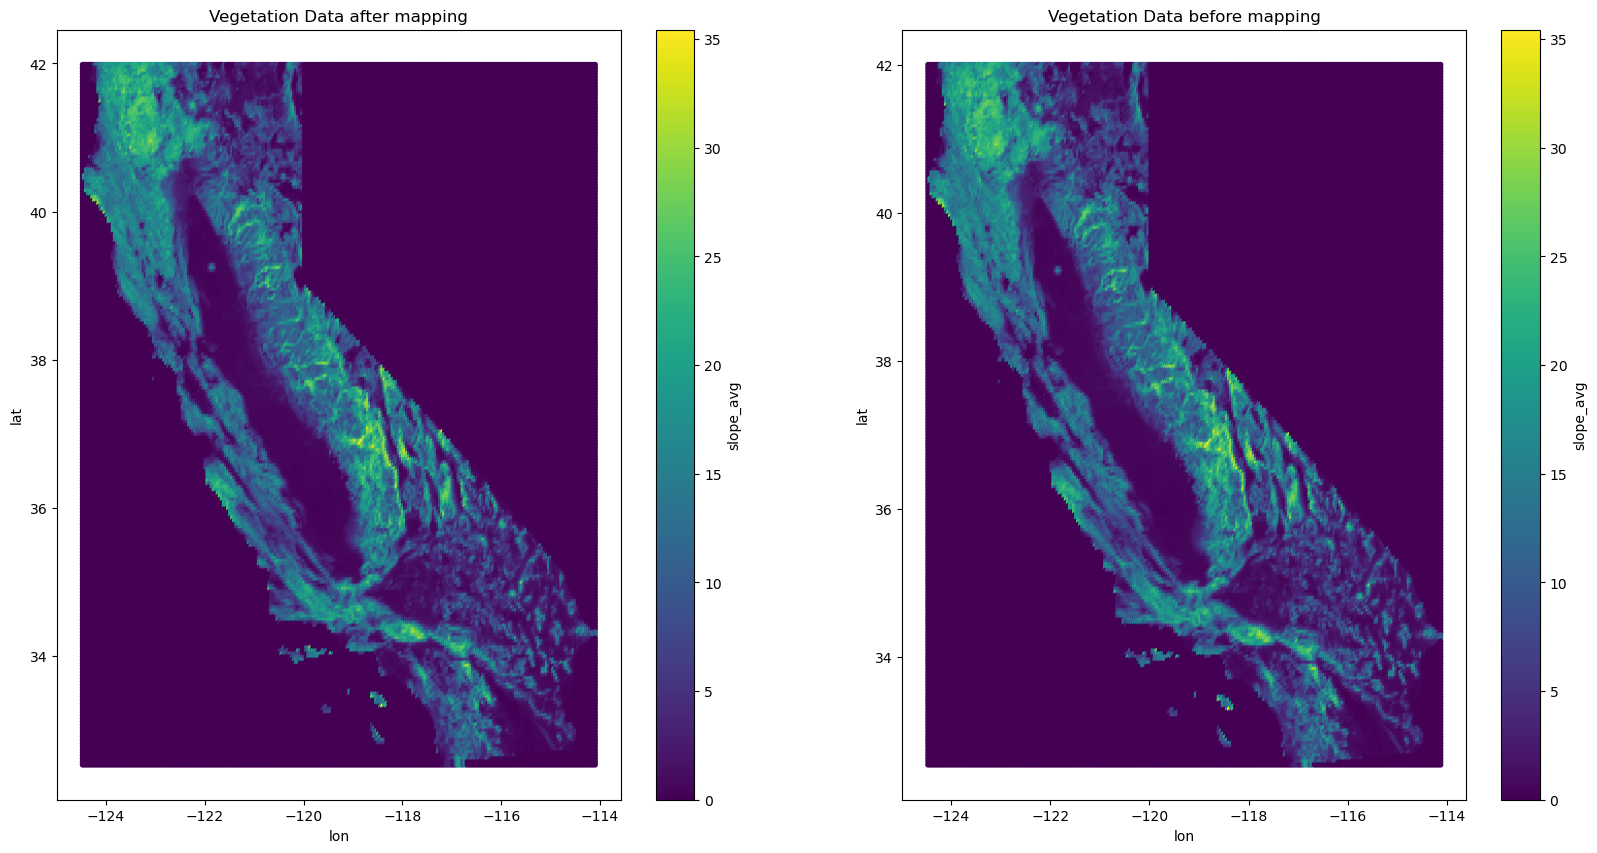

In [81]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot lon_lat_combinations on the first subplot
lon_lat_combinations.plot(kind='scatter', x='lon', y='lat', c='slope_avg', cmap='viridis', s=10, ax=axes[0])
axes[0].set_title('Vegetation Data after mapping')

# Plot vegetation_dat on the second subplot
slope_merge.plot(kind='scatter', x='lon', y='lat', c='slope_avg', cmap='viridis', s=10, ax=axes[1])
axes[1].set_title('Vegetation Data before mapping')

# Show the plots
plt.show()

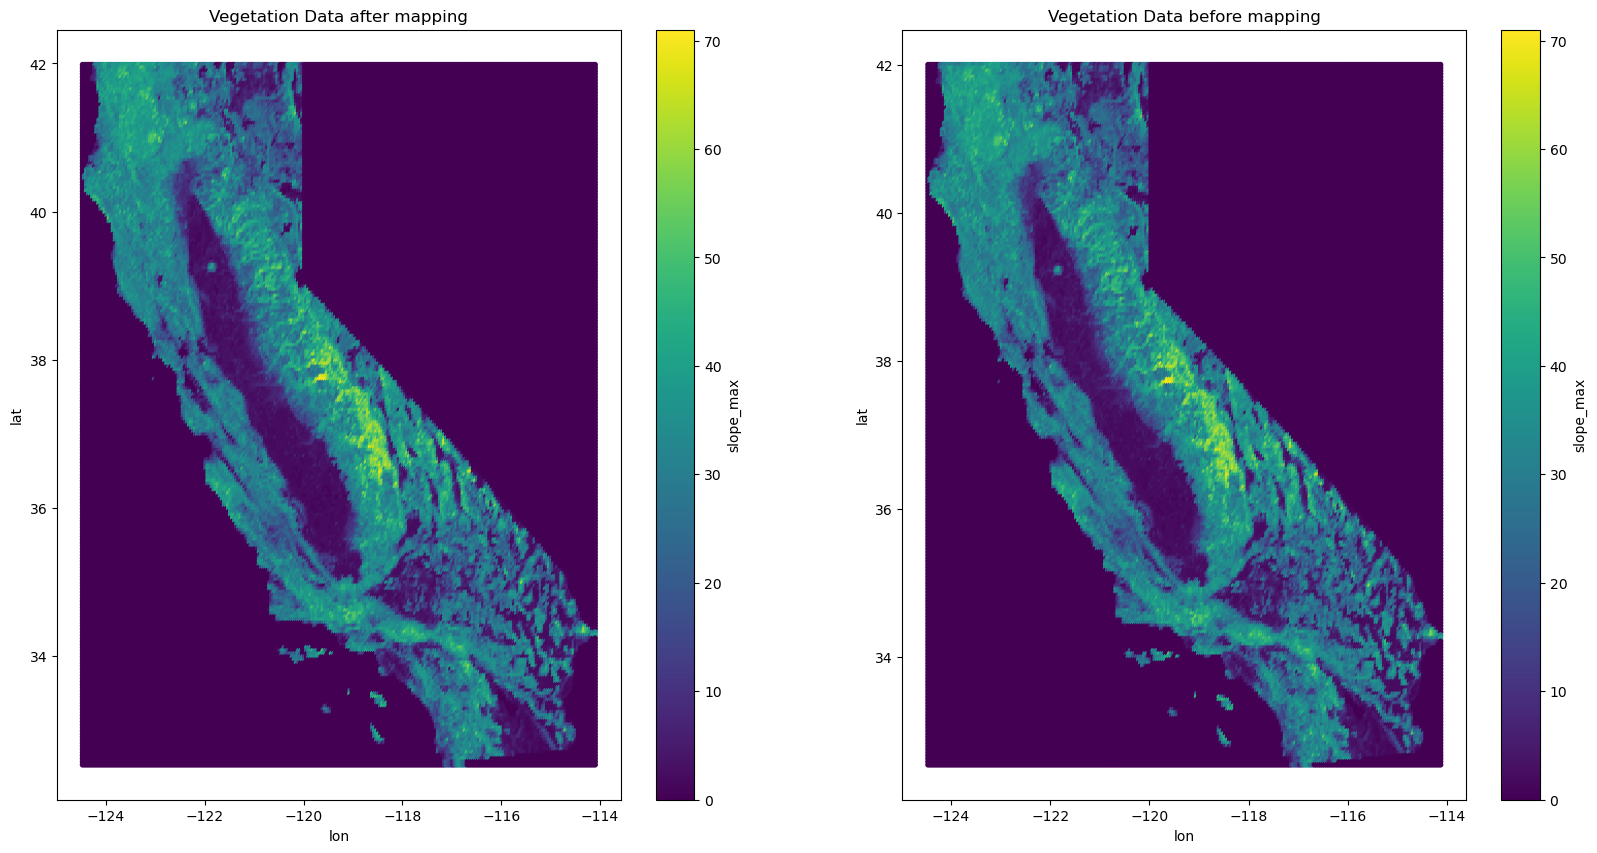

In [80]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot lon_lat_combinations on the first subplot
lon_lat_combinations.plot(kind='scatter', x='lon', y='lat', c='slope_max', cmap='viridis', s=10, ax=axes[0])
axes[0].set_title('Vegetation Data after mapping')

# Plot vegetation_dat on the second subplot
slope_merge.plot(kind='scatter', x='lon', y='lat', c='slope_max', cmap='viridis', s=10, ax=axes[1])
axes[1].set_title('Vegetation Data before mapping')

# Show the plots
plt.show()

In [97]:
# fill na with 0
lon_lat_combinations['slope_avg'] = lon_lat_combinations['slope_avg'].fillna(0)
lon_lat_combinations['slope_max'] = lon_lat_combinations['slope_max'].fillna(0)

In [98]:
# save data to parquet file
lon_lat_combinations.to_parquet('../Clean_Data/lon_lat_pair_weather_match_slope.parquet')